# <H1><center>**Loan Prediction Model**
# <H4><center>**By Hafidh Diya Ulhaqi Dewantoro**
---
---

## **Background**
In the financial sector, assessing loan status is crucial for risk management and decision-making processes. Traditional methods often involve manual evaluation, which can be time-consuming and prone to human error. Utilizing machine learning models can streamline this process by automating loan status predictions based on various applicant features.

## **Problem Statement**
The objective is to develop robust machine learning models capable of accurately predicting loan status based on applicant information. This will facilitate quicker and more objective decision-making for loan approvals.

## **Goals**

1. Build SVM, Decision Tree (DT), K-Nearest Neighbors (KNN), Logistic Regression (LogReg), and Random Forest classifiers for loan status prediction.

2. Utilize appropriate evaluation metrics to assess model performance.

3. Optimize each model to ensure generalizability and robustness.

4. Determine the best-performing model for loan status prediction.

## **Dataset**
Source: [Loan Status Prediction](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)

The dataset contains information about loan applicants, including features such as credit score, income, loan amount, and loan term. The target variable is the loan status, indicating whether the loan was approved or not.

### **Column Description**

| Column Name        | Description                                           |
|--------------------|-------------------------------------------------------|
| Loan_ID            | A unique loan ID.                                     |
| Gender             | Either male or female.                                |
| Married            | Whether Married (yes) or Not Married (No).            |
| Dependents         | Number of persons depending on the client.            |
| Education          | Applicant Education (Graduate or Undergraduate).      |
| Self_Employed      | Self-employed (Yes/No).                               |
| ApplicantIncome    | Applicant income.                                     |
| CoapplicantIncome  | Co-applicant income.                                  |
| LoanAmount         | Loan amount in thousands.                             |
| Loan_Amount_Term   | Terms of the loan in months.                          |
| Credit_History     | Credit history meets guidelines.                      |
| Property_Area      | Applicants are living either Urban, Semi-Urban, or Rural. |
| Loan_Status        | Loan approved (Y/N).                                  |


In [354]:
import pandas as pd

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [355]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [356]:
dataDesc=[]
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Unique',
    'Unique Sample'
])

,Data Features,Data Types,Unique,Unique Sample
0,Loan_ID,object,381,"[LP001024, LP001194]"
1,Gender,object,2,"[nan, Male]"
2,Married,object,2,"[No, Yes]"
3,Dependents,object,4,"[0, nan]"
4,Education,object,2,"[Graduate, Not Graduate]"
5,Self_Employed,object,2,"[Yes, No]"
6,ApplicantIncome,int64,322,"[4652, 3074]"
7,CoapplicantIncome,float64,182,"[2083.0, 4333.0]"
8,LoanAmount,float64,101,"[105.0, 76.0]"
9,Loan_Amount_Term,float64,10,"[60.0, 360.0]"


In [357]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [358]:
df['Loan_Status'].value_counts()

Loan_Status
Y    271
N    110
Name: count, dtype: int64

In [359]:
df.shape

(381, 13)

**Insights:**

1. Terdapat null value pada kolom `Gender`, `Dependents`, `Self_Employed`, `Loan_Amount_Term`, dan `Credit_History`

2. Categorical Features:

    - Gender
    
    - Married
    
    - Dependents
    
    - Education
    
    - Property_Area

3. Numerical Features:

    - ApplicantIncome
    
    - CoapplicantIncome
    
    - LoanAmount
    
    - Loan_Amount_Term
    
    - Credit_History

4. Target / Label : Loan_Status

## **Data Cleaning**

### **Data Type**

In [360]:
# Ubah tipe data kolom 'Loan_Status' menjadi int
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

### **Missing Values**

In [361]:
df.isna().sum()/len(df)*100

Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

> ### Kolom Gender

In [362]:
df['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [363]:
df['Gender'].fillna('Male', inplace=True)

> ### Kolom Dependents

In [364]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [365]:
df['Dependents'].fillna('0', inplace=True)

> ### Kolom Self_Employed

In [366]:
df['Self_Employed'].value_counts()

Self_Employed
No     325
Yes     35
Name: count, dtype: int64

In [367]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

> ### Kolom Loan_Amount_Term

In [368]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [369]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

> ### Kolom Credit_History

In [370]:
df['Credit_History'].value_counts()

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

In [371]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [372]:
# Validasi null value pada dataset

df.isna().sum()/len(df)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

## **Evaluation Metrics**

Target =

1 : Pinjaman disetujui

0 : Pinjaman tidak disetujui

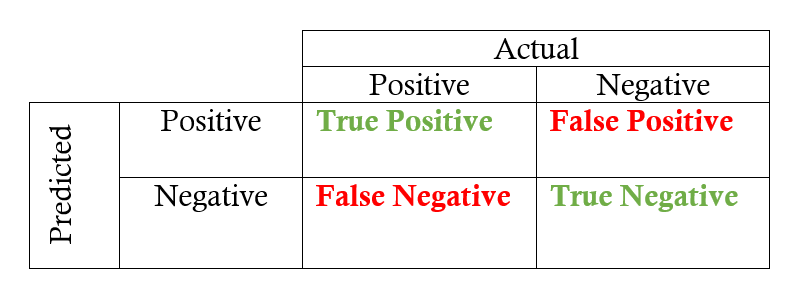

- TP (**True Positive**): Model memprediksi dengan benar bahwa pinjaman disetujui (1) dan prediksi tersebut sesuai dengan kenyataan bahwa pinjaman memang disetujui.

- TN (**True Negative**): Model memprediksi dengan benar bahwa pinjaman tidak disetujui (0) dan prediksi tersebut sesuai dengan kenyataan bahwa pinjaman memang tidak disetujui.

- FP (**False Positive**): Model salah memprediksi bahwa pinjaman disetujui (1), padahal sebenarnya pinjaman tidak disetujui (0).

- FN (**False Negative**): Model salah memprediksi bahwa pinjaman tidak disetujui (0), padahal sebenarnya pinjaman disetujui (1).

**Konsekuensi** False Positive (FP):

- Dampak dari FP dapat menyebabkan risiko keuangan, di mana pinjaman yang seharusnya tidak disetujui dapat diberikan kepada peminjam yang berpotensi gagal membayar kembali.

- Kesalahan ini dapat menyebabkan kerugian finansial bagi pemberi pinjaman, serta dapat merusak reputasi dan kepercayaan pelanggan.

**Konsekuensi** False Negative (FN):

- Dampak dari FN adalah penolakan pinjaman yang sebenarnya dapat disetujui, yang dapat merugikan peminjam yang layak dan membatasi akses mereka terhadap sumber dana yang dibutuhkan.

- Kesalahan ini dapat mengakibatkan peluang bisnis yang hilang bagi pemberi pinjaman, serta dapat menciptakan ketidakpuasan dan ketidakpercayaan di antara peminjam yang layak.

Dalam banyak kasus, tipe error False Negative (FN) sering dianggap lebih fatal dan perlu di minimalisir. Hal ini disebabkan oleh dampak langsung terhadap individu atau bisnis yang mungkin kehilangan kesempatan atau keuntungan finansial yang signifikan. Namun, penting juga untuk mempertimbangkan konteks spesifik dari aplikasi dan konsekuensi dari masing-masing tipe error dalam mengembangkan model yang optimal.

Meminimalkan false negatives (FN) adalah prioritas karena ini berarti meminimalkan jumlah kasus di mana model salah mengklasifikasikan pelamar yang sebenarnya layak sebagai tidak layak, sehingga recall memberikan fokus pada kemampuan model untuk mengidentifikasi semua pelamar yang sebenarnya layak.

Metrics yang digunakan untuk meminimalkan False Negative (FN) adalah **Recall Score**.

## **Create Model**

In [373]:
# Define features and target
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

In [374]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [375]:
# Define categorical and numerical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('num_preprocessor', ColumnTransformer(transformers=[
        ('robust_scaler', RobustScaler(), ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']),
        ('standard_scaler', StandardScaler(), ['Credit_History'])
    ], remainder='passthrough'))
])

# Combine preprocessing steps for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [376]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_preprocessor',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('robust_scaler',
                                                                                   RobustScaler(),
                                                                                   ['ApplicantIncome',
                                                                                    'CoapplicantIncome',
                                                                                    'LoanAmount',
                                                                                    'Loan_Amount_Term']),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['Credit_History'])]))]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed',
                                  'Property_Area'])])

In [377]:
# Define KNN model
knn_model = KNeighborsClassifier()

# Define parameter grid
param_grid = {'classifier__n_neighbors': [3, 5, 7, 9, 11]}

# Define pipeline with preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_model)
])

# Define GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='recall')

# Perform Grid Search
grid_search.fit(X, y)

# Get best parameter
best_k = grid_search.best_params_['classifier__n_neighbors']
print("Best value for K:", best_k)

Best value for K: 9


In [378]:
# Define Decision Tree model
dt_model = DecisionTreeClassifier()

# Define parameter grid
param_grid = {'classifier__max_depth': [3, 5, 7, 9, 11]}

# Define pipeline with preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt_model)
])

# Define GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='recall')

# Perform Grid Search
grid_search.fit(X, y)

# Get best parameter
best_depth = grid_search.best_params_['classifier__max_depth']
print("Best value for max depth:", best_depth)

Best value for max depth: 3


In [379]:
# Define models
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(max_depth=best_depth, criterion='entropy'),
    'KNN': KNeighborsClassifier(n_neighbors=best_k),
    'Logistic Regression': LogisticRegression(solver= 'liblinear'),
    'Random Forest': RandomForestClassifier()
}

In [380]:
# Fit models and evaluate recall using cross-validation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    # Perform cross-validation with 5 folds
    recall_scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
    # Calculate mean recall score
    mean_recall = recall_scores.mean()
    print(f'{name} - Mean Recall: {mean_recall}')

SVM - Mean Recall: 0.988956228956229
Decision Tree - Mean Recall: 0.9851851851851852
KNN - Mean Recall: 0.9778451178451177
Logistic Regression - Mean Recall: 0.9777777777777779


Random Forest - Mean Recall: 0.940942760942761


In [381]:
# Collect results in a dictionary
results = {'Model': [], 'Mean Recall': [], 'Mean Accuracy': []}

skfold = StratifiedKFold(n_splits=5)

# Fit models and evaluate recall and accuracy using cross-validation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    # Perform cross-validation with 5 folds
    recall_scores = cross_val_score(pipeline, X, y, cv=skfold, scoring='recall')
    accuracy_scores = cross_val_score(pipeline, X, y, cv=skfold, scoring='accuracy')
    # Calculate mean recall and accuracy scores
    mean_recall = recall_scores.mean()
    mean_accuracy = accuracy_scores.mean()
    results['Model'].append(name)
    results['Mean Recall'].append(mean_recall)
    results['Mean Accuracy'].append(mean_accuracy)

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results).sort_values(by='Mean Recall', ascending=False)

# Print DataFrame
print(results_df)

                 Model  Mean Recall  Mean Accuracy
0                  SVM     0.988956       0.711278
1        Decision Tree     0.988889       0.837286
2                  KNN     0.977845       0.839884
3  Logistic Regression     0.977778       0.837252
4        Random Forest     0.940943       0.832023


Berdasarkan hasil evaluasi menggunakan cross-validation dengan metrik recall dan akurasi, serta mengutamakan metric recall, dan dengan melihat hasil di atas, berikut adalah interpretasi dan pemilihan model terbaik:

1. SVM (Support Vector Machine): Model SVM memiliki nilai recall yang sangat tinggi sebesar 0.989 dan akurasi sebesar 0.711. Meskipun memiliki recall tertinggi, namun akurasi relatif rendah.

2. Decision Tree: Model Decision Tree memiliki nilai recall yang sama dengan SVM, yaitu 0.989, namun memiliki akurasi yang sedikit lebih tinggi sebesar 0.837. Ini menunjukkan bahwa model Decision Tree mampu mengidentifikasi sekitar 98.9% dari semua pelamar yang sebenarnya layak mendapatkan pinjaman dengan benar, dan memiliki akurasi sekitar 83.7%.

3. KNN (K-Nearest Neighbors): Model KNN memiliki nilai recall yang cukup tinggi sebesar 0.978 dan akurasi yang sedikit lebih tinggi sebesar 0.840. Ini menunjukkan bahwa model KNN mampu mengidentifikasi sekitar 97.8% dari semua pelamar yang sebenarnya layak mendapatkan pinjaman dengan benar, dan memiliki akurasi sekitar 84.0%.

4. Logistic Regression: Model Logistic Regression memiliki nilai recall yang sama dengan KNN, yaitu 0.978, namun memiliki akurasi yang sedikit lebih rendah sebesar 0.837.

5. Random Forest: Model Random Forest memiliki nilai recall yang lebih rendah sebesar 0.941 dan akurasi yang lebih rendah pula sebesar 0.832.

Berdasarkan interpretasi di atas, dengan mengutamakan metric recall, model terbaik adalah Decision Tree dan KNN karena keduanya memiliki nilai recall tertinggi, yaitu 0.989 dan 0.978, sementara itu, model KNN memiliki akurasi yang sedikit lebih tinggi dibandingkan dengan model Decision Tree. Jadi, model **Decision Tree** mungkin merupakan pilihan terbaik untuk kasus ini. 